In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../new_data/persian_annotations.csv")
cols = ["id", "filename","emotions","emoji","gender","confidence","comment","intensity"]

## Flattening data
contents = []
for i in range(0, data.shape[0]):
    row = data.iloc[i]
    for emotion in row['emotions'].split(','):
        # for emoji in row['emoji'].split(','):
        contents.append([row["id"], row["filename"], emotion, row['emoji'], row["gender"], row["confidence"],
                     row["comment"], row["intensity"]])
flattened_df = pd.DataFrame(columns=cols, data=contents)

In [3]:
labels_df = pd.read_csv("../new_data/labels.csv", index_col='filename')
labels_df['emotions'] = labels_df['emotions'].apply(eval)


In [4]:
average_intensity = flattened_df.groupby(['filename'])['intensity'].mean()
average_confidence = flattened_df.groupby(['filename'])['confidence'].mean()

In [5]:
labels_df = pd.concat([labels_df, average_intensity, average_confidence], axis=1)

In [6]:
contents = []
for idx in labels_df.index:
    row = labels_df.loc[idx]
    # print(i)
    for emotion in row['emotions']:
        contents.append([idx, emotion, row['intensity'], row['confidence']])

intensity_flattened = pd.DataFrame(columns=['filename', 'emotion', 'intensity', 'confidence'], data=contents)
intensity_flattened

,filename,emotion,intensity,confidence
0,persian/vid_1.mp4,annoyed,2.500,4.000000
1,persian/vid_10.mp4,contempt,2.500,3.666667
2,persian/vid_11.mp4,contempt,2.625,3.625000
3,persian/vid_12.mp4,contempt,2.400,4.000000
4,persian/vid_13.mp4,anger,1.750,4.250000
...,...,...,...,...
116,persian/vid_94.mp4,none,1.500,3.000000
117,persian/vid_95.mp4,contempt,3.250,4.375000
118,persian/vid_95.mp4,hatred,3.250,4.375000
119,persian/vid_96.mp4,contempt,2.200,3.200000


<AxesSubplot:title={'center':'FE Intensity of labels'}, xlabel='emotion'>

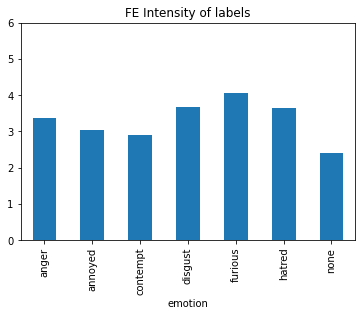

In [10]:
intensity_flattened.groupby('emotion')['intensity'].mean().plot(kind='bar', title='FE Intensity of labels', ylabel='', yticks=range(0,7))

<AxesSubplot:title={'center':"Annotator's confidence of labels"}, xlabel='emotion'>

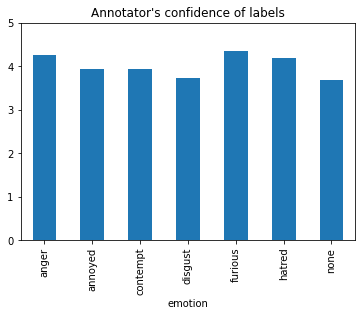

In [9]:
intensity_flattened.groupby('emotion')['confidence'].mean().plot(kind='bar', title='Annotator\'s confidence of labels', ylabel='', yticks = range(0,6))

<AxesSubplot:title={'center':'Intensity STD'}, xlabel='emotion'>

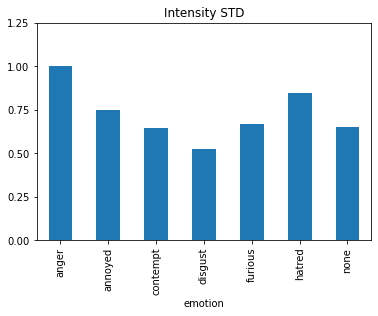

In [12]:
intensity_flattened.groupby('emotion')['intensity'].std().plot(kind='bar', title='Intensity STD', ylabel='', yticks = [0, 0.25, 0.5, 0.75, 1.0, 1.25])

<AxesSubplot:title={'center':'Confidence score STD'}, xlabel='emotion'>

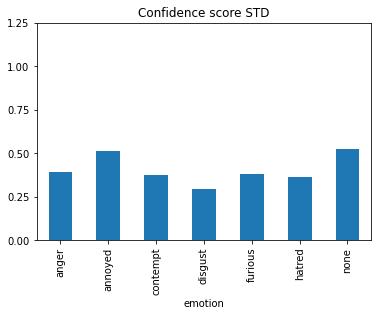

In [13]:
intensity_flattened.groupby('emotion')['confidence'].std().plot(kind='bar', title='Confidence score STD', ylabel='', yticks = [0, 0.25, 0.5, 0.75, 1.0, 1.25])